In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import requests
import seaborn as sns
from pathlib import Path  # Import one object from a library
import wordcloud as wc    # import with aliasing
import imageio            # Standard import with no aliasing
from bs4 import BeautifulSoup


def dataFrame(speech):
     #Gets the website 
    source = requests.get(speech)
    soup = BeautifulSoup(source.text,'html.parser')
    punctuation = ".!?,.:-|"
    allWords = soup.get_text(" ", strip=True).lower()
    
    df = pd.DataFrame({
    "Word": ["Frequency"],
    })

    #Eliminates all of the punctuation 
    for x in allWords:
        if x in punctuation:
            allWords = allWords.replace(x, "")
            

    newWord = []
    
    allWords = allWords.split()
    
    #Makes the rows of the dataframe
    for word in allWords:
        if len(word) > 4:
            newWord.append(word)
            newRow = {'Word':word, 'Frequency':1}

            df2 = pd.DataFrame(newRow, index=[0])

            #append row to the dataframe
            df = pd.concat((df, df2), axis = 0 )


    #Removes duplicate rows
    df['Frequency'] = df.groupby(['Word']).transform('count')
    df = df.drop_duplicates()

    sortData = df.sort_values('Frequency', ascending = False)

        
    return sortData.head(100)


def wordCloud(pres, speech):
    
    #Gets the website 
    source = requests.get(speech)
    soup = BeautifulSoup(source.text,'html.parser')

    #Turns the website text into a long string
    allWords = soup.get_text(" ", strip=True)
    
    punctuation = ".!?,.:-|"
 
    stopWords = ['let', 'all','by', 'not', 'can', 'our','but','this', 'we', 'it', 'will','are', 'is', 'her', '\xa0', 'has', 'at', 'from', 'as', '|', 'you', 'of', 'how', 'on', 'i', 'for', 'and', 'they','-', 'his', 'in', 'with', 'the', 'to', 'him', 'a', 'be', '&', 'was', 'that']
   
    #Eliminates all of the punctuation 
    for x in allWords:
        if x in punctuation:
            allWords = allWords.replace(x, "")
            
    #Turns the string into a long list and then removes all of the stop words
            
    allWords = allWords.lower().split()

    for y in allWords:
        if y in stopWords:
            allWords.remove(y)
    
    #Turn list to string
    cleanWords = " ".join(str(x) for x in allWords)
    # Configure cloud
    speech = wc.WordCloud() 

    # Generate the word cloud
    speechCloud = speech.generate(cleanWords)

    # Display the cloud

    plt.figure(figsize=(10,10)) 
    plt.axis('off')
    plt.title(str(pres) + " Wordcloud")
    plt.imshow(speechCloud) 
    
    return speechCloud

#Reads the file with all of the words
def read_txt(filename):


    words = []
    with open(filename, "r") as txtfile:
        lines = txtfile.readlines()
        for line in lines:
            words += line.split()
    return words

def evaluatePerHundred(file):
    #Makes a dataframe of all of the words with their matching values 
    data = pd.read_csv('wordwithStrength.txt', sep = "\t", names = ['Word','Point Score'])
    
    #Sorts the words so that is grouped by word
    data = data.groupby('Word').mean()
        
     #Gets the website 
    source = requests.get(file)
    soup = BeautifulSoup(source.text,'html.parser')

    #Turns the website text into a long string
    allWords = soup.get_text(" ", strip=True).lower().split()
    
    #Variables that will be used to hold the scores of the speeches per hundred words
    countEvaluate = 0
    
    allCount = 0
    
    counter = 0
    
    scorePerHundred = []
    
    averageScore = 0
          
    #Finds all of the point values for the words and sums them up (per 100 words)
    for words in allWords:
        if counter == 100:
            scorePerHundred.append(countEvaluate)
            counter = 0
        else:            
            if words in wordStrength:
                countEvaluate += (data._get_value(words, 'Point Score'))
            counter += 1
    
    #Averages the scores per hundred words
    for values in scorePerHundred:
        averageScore += values
     
    averageScore = averageScore/ len(scorePerHundred)
    
    return(averageScore)

def evaluateGeneral(file):
    #Makes a dataframe of all of the words with their matching values 
    data = pd.read_csv('wordwithStrength.txt', sep = "\t", names = ['Word','Point Score'])
    
    #Sorts the words so that is grouped by word
    data = data.groupby('Word').mean()
        
     #Gets the website 
    source = requests.get(file)
    soup = BeautifulSoup(source.text,'html.parser')

    #Turns the website text into a long string
    allWords = soup.get_text(" ", strip=True).lower().split()
    
    #Variables that will be used to hold the scores of the speeches per hundred words
    countEvaluate = 0
    
    allCount = 0
    
    counter = 0
          
    #Finds all of the point values for the words and sums them up (per 100 words)
    for words in allWords:
        
        if words in wordStrength:
            countEvaluate += (data._get_value(words, 'Point Score'))
    
    
    return(countEvaluate)


JFKSpeech = "https://www.presidency.ucsb.edu/documents/inaugural-address-2"

ReaganSpeech = "https://www.presidency.ucsb.edu/documents/inaugural-address-11"

BushSpeech = "https://www.presidency.ucsb.edu/documents/inaugural-address-52"

ObamaSpeech = "https://www.presidency.ucsb.edu/documents/inaugural-address-15"

TrumpSpeech = "https://www.presidency.ucsb.edu/documents/inaugural-address-14"

BidenSpeech = "https://www.presidency.ucsb.edu/documents/inaugural-address-53"

wordStrength = "wordwithStrength.txt"

wordStrength = read_txt(wordStrength)

#Creates several dataframes with all of the speeches
JFKDF = dataFrame(JFKSpeech).head(10)
ReaganDF = dataFrame(ReaganSpeech).head(10)
BushDF = dataFrame(BushSpeech).head(10)
ObamaDF = dataFrame(ObamaSpeech).head(10)
TrumpDF = dataFrame(TrumpSpeech).head(10)
BidenDF = dataFrame(BidenSpeech).head(10)



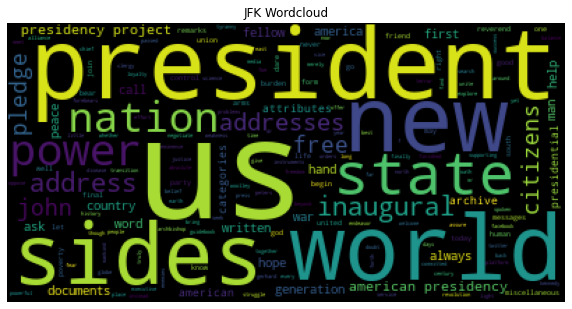

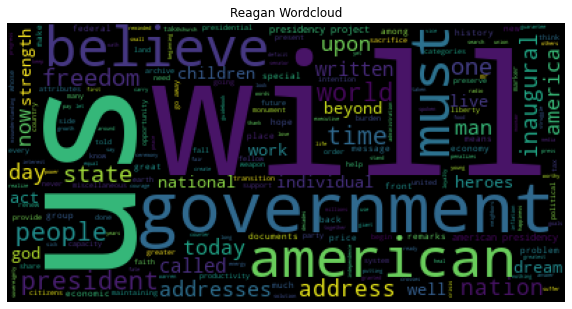

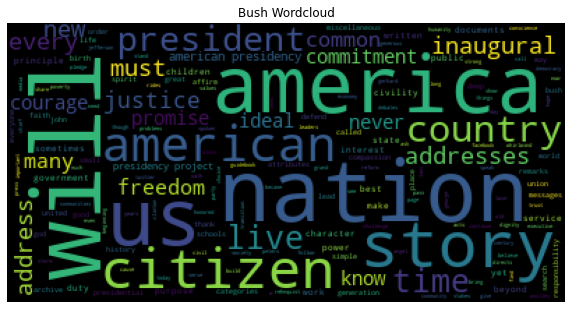

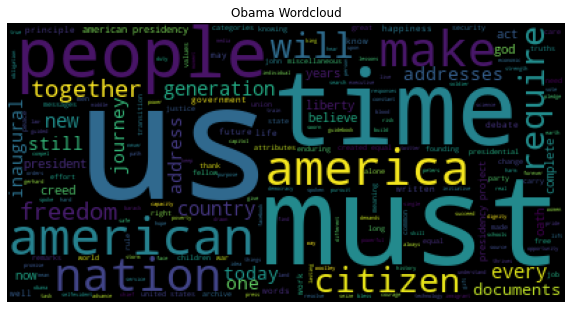

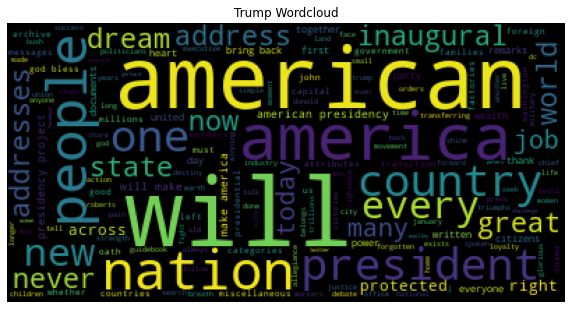

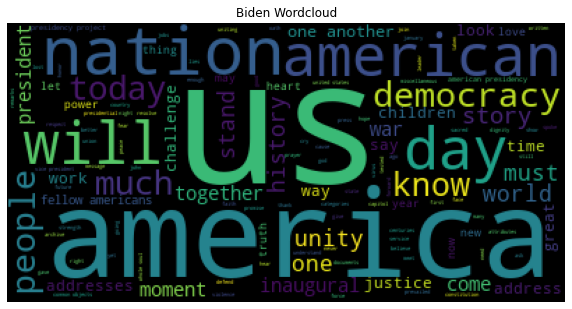

In [2]:
#Uses two different ways of scoring speeches for all of the speeches and makes word clouds 

JFKEval = evaluatePerHundred(JFKSpeech)
JFKGenEval = evaluateGeneral(JFKSpeech)

display(wordCloud("JFK", JFKSpeech))

ReaganEval = evaluatePerHundred(ReaganSpeech)
ReaganGenEval = evaluateGeneral(ReaganSpeech)

display(wordCloud("Reagan", ReaganSpeech))

BushEval = evaluatePerHundred(BushSpeech)
BushGenEval = evaluateGeneral(BushSpeech)

display(wordCloud("Bush", BushSpeech))

ObamaEval = evaluatePerHundred(ObamaSpeech)
ObamaGenEval = evaluateGeneral(ObamaSpeech)

display(wordCloud("Obama", ObamaSpeech))

TrumpEval = evaluatePerHundred(TrumpSpeech)
TrumpGenEval = evaluateGeneral(TrumpSpeech)

display(wordCloud("Trump",TrumpSpeech))

BidenEval = evaluatePerHundred(BidenSpeech)
BidenGenEval  = evaluateGeneral(BidenSpeech)

display(wordCloud("Biden", BidenSpeech))

In order to score correctly, it is important to determine multiple ways of scoring
For that reason I have made two graphs to show the differnce between scoring every 100 words and scoring per all words
The first graph shows the former in blue while the second shows per all words in red
****************************************************************************************************
The next two graphs show the presidents on bar graph in relation to their politcal party
The dark blue plot shows democrats and the dark red shows republicans
It appears that democratic presidents tend to have drastically more negative speeches in contrast to republicans
****************************************************************************************************
CITATIONS
Minqing Hu and Bing Liu. Mining and Summarizing Customer Reviews Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, Washington, USA 


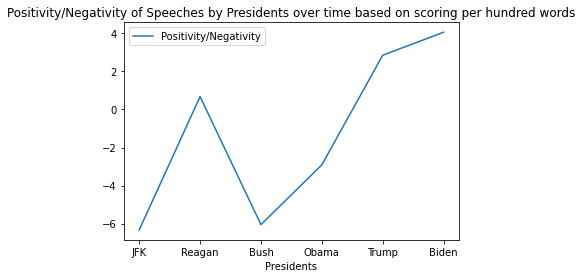

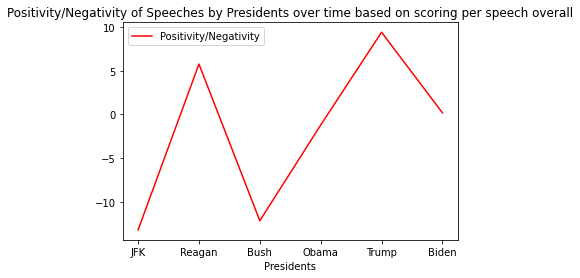

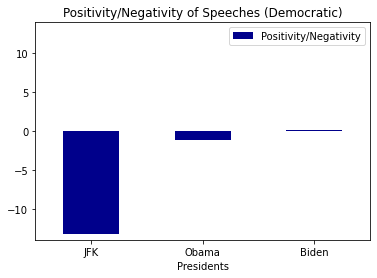

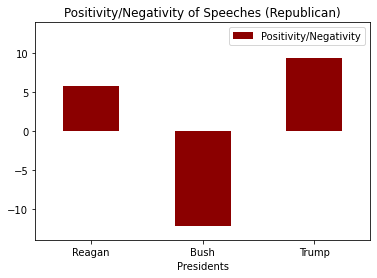

In [3]:
print("In order to score correctly, it is important to determine multiple ways of scoring")
print("For that reason I have made two graphs to show the differnce between scoring every 100 words and scoring per all words")
print("The first graph shows the former in blue while the second shows per all words in red")
print("*" * 100)

#Line graph depicting positivity/negativity over time per hundred words
hun = pd.DataFrame({'Presidents':['JFK', 'Reagan','Bush','Obama','Trump','Biden'], 'Positivity/Negativity':[JFKEval, ReaganEval, BushEval,ObamaEval,TrumpEval,BidenEval]})
ax = hun.plot.line(x='Presidents', y='Positivity/Negativity', rot=0, title = "Positivity/Negativity of Speeches by Presidents over time based on scoring per hundred words")
ax.plot()

#Line graph depicting positivity/negativity over time per all words
gen = pd.DataFrame({'Presidents':['JFK', 'Reagan','Bush','Obama','Trump','Biden'], 'Positivity/Negativity':[JFKGenEval, ReaganGenEval, BushGenEval,ObamaGenEval,TrumpGenEval,BidenGenEval]})
ax = gen.plot.line(x='Presidents', y='Positivity/Negativity', rot=0, title = "Positivity/Negativity of Speeches by Presidents over time based on scoring per speech overall", color = 'red')
ax.plot()

print("The next two graphs show the presidents on bar graph in relation to their politcal party")
print("The dark blue plot shows democrats and the dark red shows republicans")
print("It appears that democratic presidents tend to have drastically more negative speeches in contrast to republicans")
print("*" * 100)

#Bar graph depicting positivity/negatity in regards to political party

demo = pd.DataFrame({'Presidents':['JFK','Obama','Biden'], 'Positivity/Negativity':[JFKGenEval, ObamaGenEval,BidenGenEval]})
ax = demo.plot.bar(x='Presidents', y='Positivity/Negativity', rot=0, title = "Positivity/Negativity of Speeches (Democratic)", color = 'darkblue',ylim = (-14, 14))
ax.plot()

rep = pd.DataFrame({'Presidents':['Reagan','Bush','Trump'], 'Positivity/Negativity':[ReaganGenEval, BushGenEval,TrumpGenEval]})
ax = rep.plot.bar(x='Presidents', y='Positivity/Negativity', rot=0, title = "Positivity/Negativity of Speeches (Republican)", color = 'darkred', ylim = (-14, 14))
ax.plot()

#Bar graph depicting top 5 words used in speeches

topWords = pd.DataFrame({'Presidents':['JFK','Obama','Biden'], 'Positivity/Negativity':[JFKGenEval, ObamaGenEval,BidenGenEval]})

print("CITATIONS" + '\n' + "Minqing Hu and Bing Liu. Mining and Summarizing Customer Reviews Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, Washington, USA ")



Text(0, 0.5, 'Frequency')

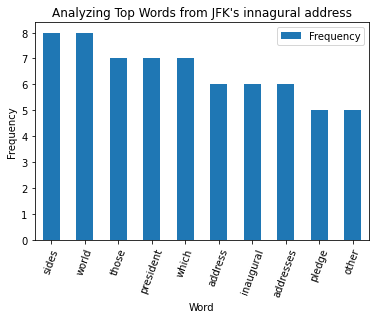

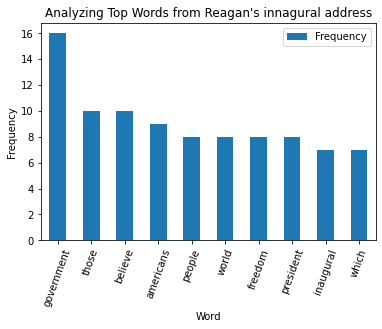

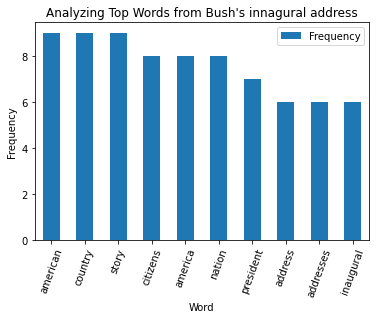

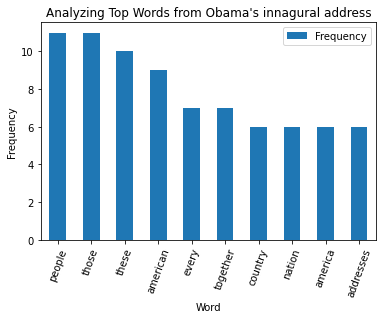

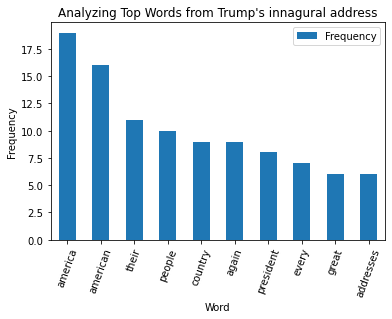

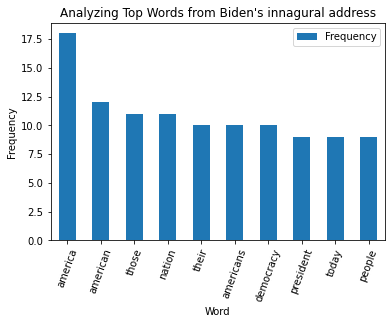

In [4]:
#Creates and displayes bar graphs depicting the top 10 words of each of the 6 speeches. 

JFKDF = dataFrame(JFKSpeech).head(10)
ReaganDF = dataFrame(ReaganSpeech).head(10)
BushDF = dataFrame(BushSpeech).head(10)
ObamaDF = dataFrame(ObamaSpeech).head(10)
TrumpDF = dataFrame(TrumpSpeech).head(10)
BidenDF = dataFrame(BidenSpeech).head(10)

JFKTopWords = JFKDF.plot.bar(x="Word", y="Frequency", rot=70, title="Analyzing Top Words from JFK's innagural address")
plt.xlabel("Word")
plt.ylabel("Frequency")

ReaganTopWords = ReaganDF.plot.bar(x="Word", y="Frequency", rot=70, title="Analyzing Top Words from Reagan's innagural address")
plt.xlabel("Word")
plt.ylabel("Frequency")

BushTopWords = BushDF.plot.bar(x="Word", y="Frequency", rot=70, title="Analyzing Top Words from Bush's innagural address")
plt.xlabel("Word")
plt.ylabel("Frequency")

ObamaTopWords = ObamaDF.plot.bar(x="Word", y="Frequency", rot=70, title="Analyzing Top Words from Obama's innagural address")
plt.xlabel("Word")
plt.ylabel("Frequency")

TrumpTopWords = TrumpDF.plot.bar(x="Word", y="Frequency", rot=70, title="Analyzing Top Words from Trump's innagural address")
plt.xlabel("Word")
plt.ylabel("Frequency")

BidenTopWords = BidenDF.plot.bar(x="Word", y="Frequency", rot=70, title="Analyzing Top Words from Biden's innagural address")
plt.xlabel("Word")
plt.ylabel("Frequency")

In this heatmap, we can see the top words from both JFK's and Biden's speeches 

The heatmap shows if that word was also in the other speech and if so, how many times


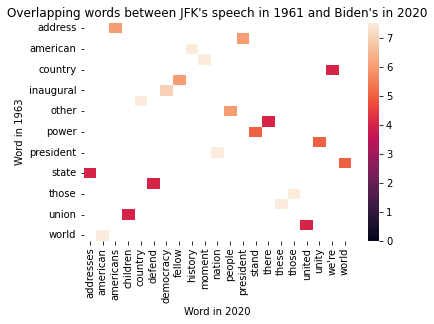

In [5]:
#Makes a heatmap comparing speeches from past to today

JFKDF = dataFrame(JFKSpeech).head(50)
BidenDF = dataFrame(BidenSpeech).head(50)

#Makes a heatmap between two speeches in a heat map 

JFKDF['Word in 1963'] = JFKDF['Word']
JFKDF['Word in 2020'] = BidenDF['Word']
JFKDF['Today Frequency'] = BidenDF['Frequency']

overlapJFKNow = pd.merge(JFKDF, BidenDF, on="Word")

df = overlapJFKNow.pivot(index="Word in 1963",columns="Word in 2020", values = 'Frequency_y')

df = df.head(25)

sns.heatmap(df, annot=False, vmin = 0, vmax = 7.5)

plt.title("Overlapping words between JFK's speech in 1961 and Biden's in 2020")

print("In this heatmap, we can see the top words from both JFK's and Biden's speeches \n")
print("The heatmap shows if that word was also in the other speech and if so, how many times")

In [6]:
#Counts the amount of sentences in the speech

def countSentence(speech):
    #Gets the website 
    source = requests.get(speech)
    soup = BeautifulSoup(source.text,'html.parser')
    punctuation = "!?,:-|"
    allWords = soup.get_text(" ", strip=True).lower()
    
    #Eliminates all of the punctuation 
    for x in allWords:
        if x in punctuation:
            allWords = allWords.replace(x, "")
            
    allWords = allWords.split()
    #Counts all periods in order to get sentence count number
    countSentences = 0
    for words in allWords:
        if words[-1] == ".":
            countSentences += 1

    return countSentences

#Gets the amount of sentences for all speeches and then averages it out and then rounds the result
JFKSentences = countSentence(JFKSpeech)
ReaganSentences = countSentence(ReaganSpeech)
BushSentences = countSentence(BushSpeech)
ObamaSentences = countSentence(ObamaSpeech)
TrumpSentences = countSentence(TrumpSpeech)
BidenSentences = countSentence(BidenSpeech)

print("The average number of sentences for all of the speeches is: ")
print(round((JFKSentences + ReaganSentences + BushSentences + ObamaSentences + TrumpSentences + BidenSentences) / 6,2))
print(" " * 50)

#Gets average amount of words per sentence
def averageWords (speech):
    countWords = 0
    listOfSentences = []
    #Gets the website 
    source = requests.get(speech)
    soup = BeautifulSoup(source.text,'html.parser')
    punctuation = "!?,:-|"
    allWords = soup.get_text(" ", strip=True).lower()
    
     #Eliminates all of the punctuation 
    for x in allWords:
        if x in punctuation:
            allWords = allWords.replace(x, "")
            
    allWords = allWords.split()
    for word in allWords:
        if len(word) > 4:
            countWords += 1
            if word[-1] == ".":
                listOfSentences.append(countWords)
                countWords = 0
    #Gets rid of first sentence as it is an outlier           
    listOfSentences = listOfSentences[1:]
    totalSentences = len(listOfSentences)
    total = 0
    
    for words in listOfSentences:
        total += words
        
    averageWords = total / totalSentences
    
    return averageWords

#Gets the average number of words per sentence for all of the speeches and averages them out and finally rounds it 
JFKAverage = averageWords(JFKSpeech)   
ReaganAverage = averageWords(ReaganSpeech)
BushAverage = averageWords(BushSpeech)
ObamaAverage = averageWords(ObamaSpeech)
TrumpAverage = averageWords(TrumpSpeech)
BidenAverage = averageWords(BidenSpeech)

print("The average number of words per sentence that were above 4 letters is: ")
print(round((JFKAverage + ReaganAverage + BushAverage + ObamaAverage + TrumpAverage + BidenAverage) / 6,2))
print("For all of the speeches")
print(" " * 50)

#Get the number of unique words per 1000 words for all speeches 
def uniqueWords(speech):
     #Gets the website 
    source = requests.get(speech)
    soup = BeautifulSoup(source.text,'html.parser')
    punctuation = ".!?,.:-|"
    allWords = soup.get_text(" ", strip=True).lower()
    
    df = pd.DataFrame({
    "Word": ["Frequency"],
    })

    #Eliminates all of the punctuation 
    for x in allWords:
        if x in punctuation:
            allWords = allWords.replace(x, "")
            

    uniqueWord = 0
    
    perThousand = 0 
    
    allWords = allWords.split()
    
    count = 0
    #Makes the rows of the dataframe
    for word in allWords:            
        count += 1
        if len(word) > 4:
            uniqueWord += 1
                        
        if count == 1000:
            perThousand = uniqueWord
            uniqueWord = 0
            
    return perThousand

#Prints our the average number of unique words for all speeches and rounds it 
print("The average number of unique words per 1000 words for all of the speechs was: ")
print(round((uniqueWords(JFKSpeech) + uniqueWords(ReaganSpeech) + uniqueWords(BushSpeech) + uniqueWords(ObamaSpeech) + uniqueWords(TrumpSpeech) + uniqueWords(BidenSpeech)) /6, 2))


The average number of sentences for all of the speeches is: 
110.33
                                                  
The average number of words per sentence that were above 4 letters is: 
9.39
For all of the speeches
                                                  
The average number of unique words per 1000 words for all of the speechs was: 
478.83
